In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-risk/financial_risk_assessment.csv


# **Import**

In [183]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [184]:
df = pd.read_csv('/kaggle/input/financial-risk/financial_risk_assessment.csv')

In [185]:
df.shape

(15000, 20)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,43.452667,14.910732,18.000000,31.000000,43.000000,56.000000,69.00000
Income,12750.0,69933.398510,29163.626207,20005.000000,44281.500000,69773.000000,95922.750000,119997.00000
Credit Score,12750.0,699.109098,57.229465,600.000000,650.000000,699.000000,748.000000,799.00000
Loan Amount,12750.0,27450.010902,12949.940135,5000.000000,16352.500000,27544.000000,38547.500000,49998.00000
Years at Current Job,15000.0,9.476267,5.769707,0.000000,4.000000,9.000000,15.000000,19.00000
Debt-to-Income Ratio,15000.0,0.350438,0.143919,0.100004,0.227386,0.350754,0.476095,0.59997
Assets Value,12750.0,159741.497176,80298.115832,20055.000000,90635.250000,159362.000000,228707.000000,299999.00000
Number of Dependents,12750.0,2.026510,1.411300,0.000000,1.000000,2.000000,3.000000,4.00000
Previous Defaults,12750.0,1.992471,1.416909,0.000000,1.000000,2.000000,3.000000,4.00000
Marital Status Change,15000.0,0.998467,0.813782,0.000000,0.000000,1.000000,2.000000,2.00000


In [188]:
df.describe(include=[object])

,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


**Missing Value Check**

In [189]:
df.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

**Duplicated value check**

In [190]:
df.duplicated().sum()

0

In [191]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


# **2. Data Transfrom**

In [192]:
df.dropna(axis=0,inplace=True)

**Data Check**

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5716 entries, 0 to 14997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5716 non-null   int64  
 1   Gender                 5716 non-null   object 
 2   Education Level        5716 non-null   object 
 3   Marital Status         5716 non-null   object 
 4   Income                 5716 non-null   float64
 5   Credit Score           5716 non-null   float64
 6   Loan Amount            5716 non-null   float64
 7   Loan Purpose           5716 non-null   object 
 8   Employment Status      5716 non-null   object 
 9   Years at Current Job   5716 non-null   int64  
 10  Payment History        5716 non-null   object 
 11  Debt-to-Income Ratio   5716 non-null   float64
 12  Assets Value           5716 non-null   float64
 13  Number of Dependents   5716 non-null   float64
 14  City                   5716 non-null   object 
 15  State   

# **3. Data Visualization**

In [194]:
num_cols = df.select_dtypes(include = {'int64','float64'}).columns
cat_cols = df.select_dtypes(include = {'object'}).columns

## **Histogram**

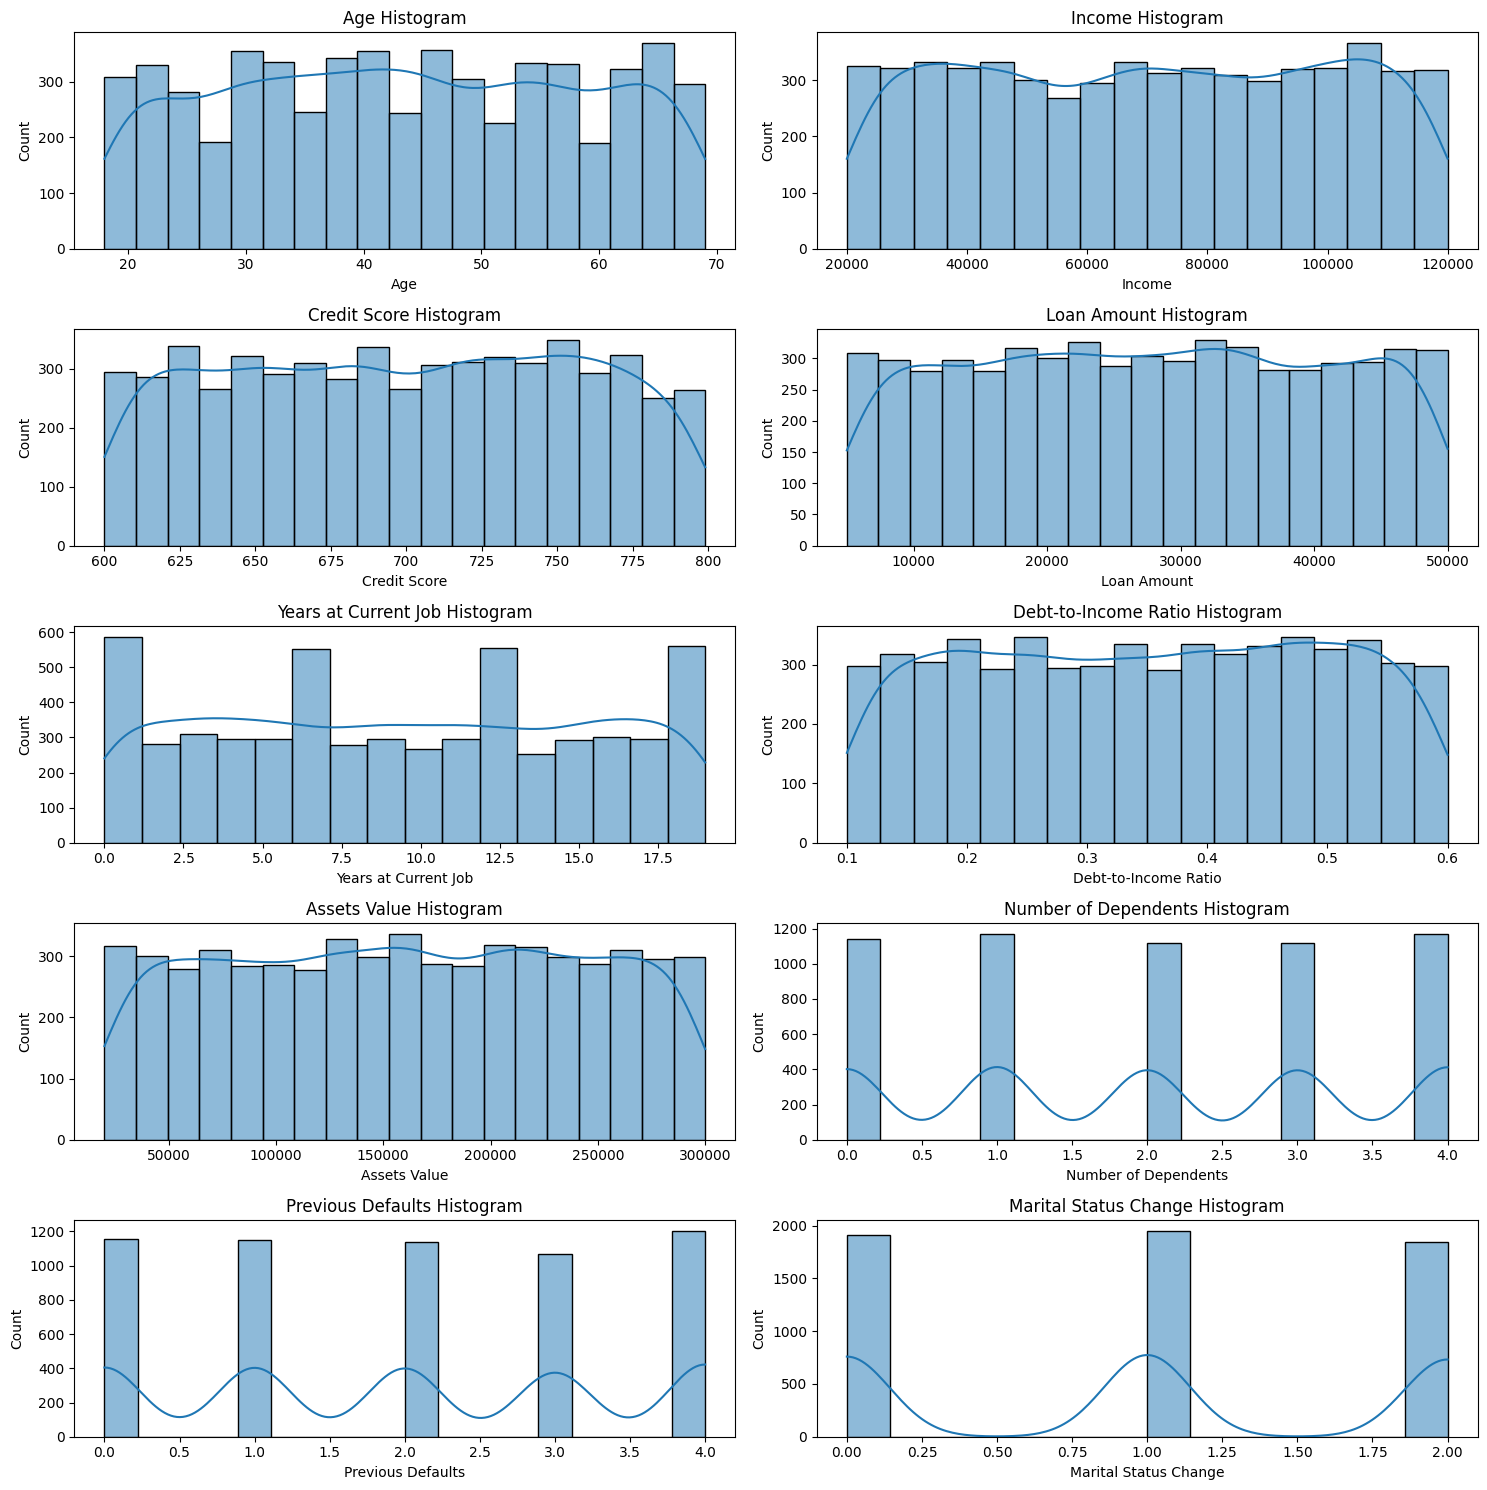

In [195]:
f, ax = plt.subplots(5,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data=df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(f'{cols} Histogram')
    
plt.tight_layout()
plt.show()  

## **Boxplot**

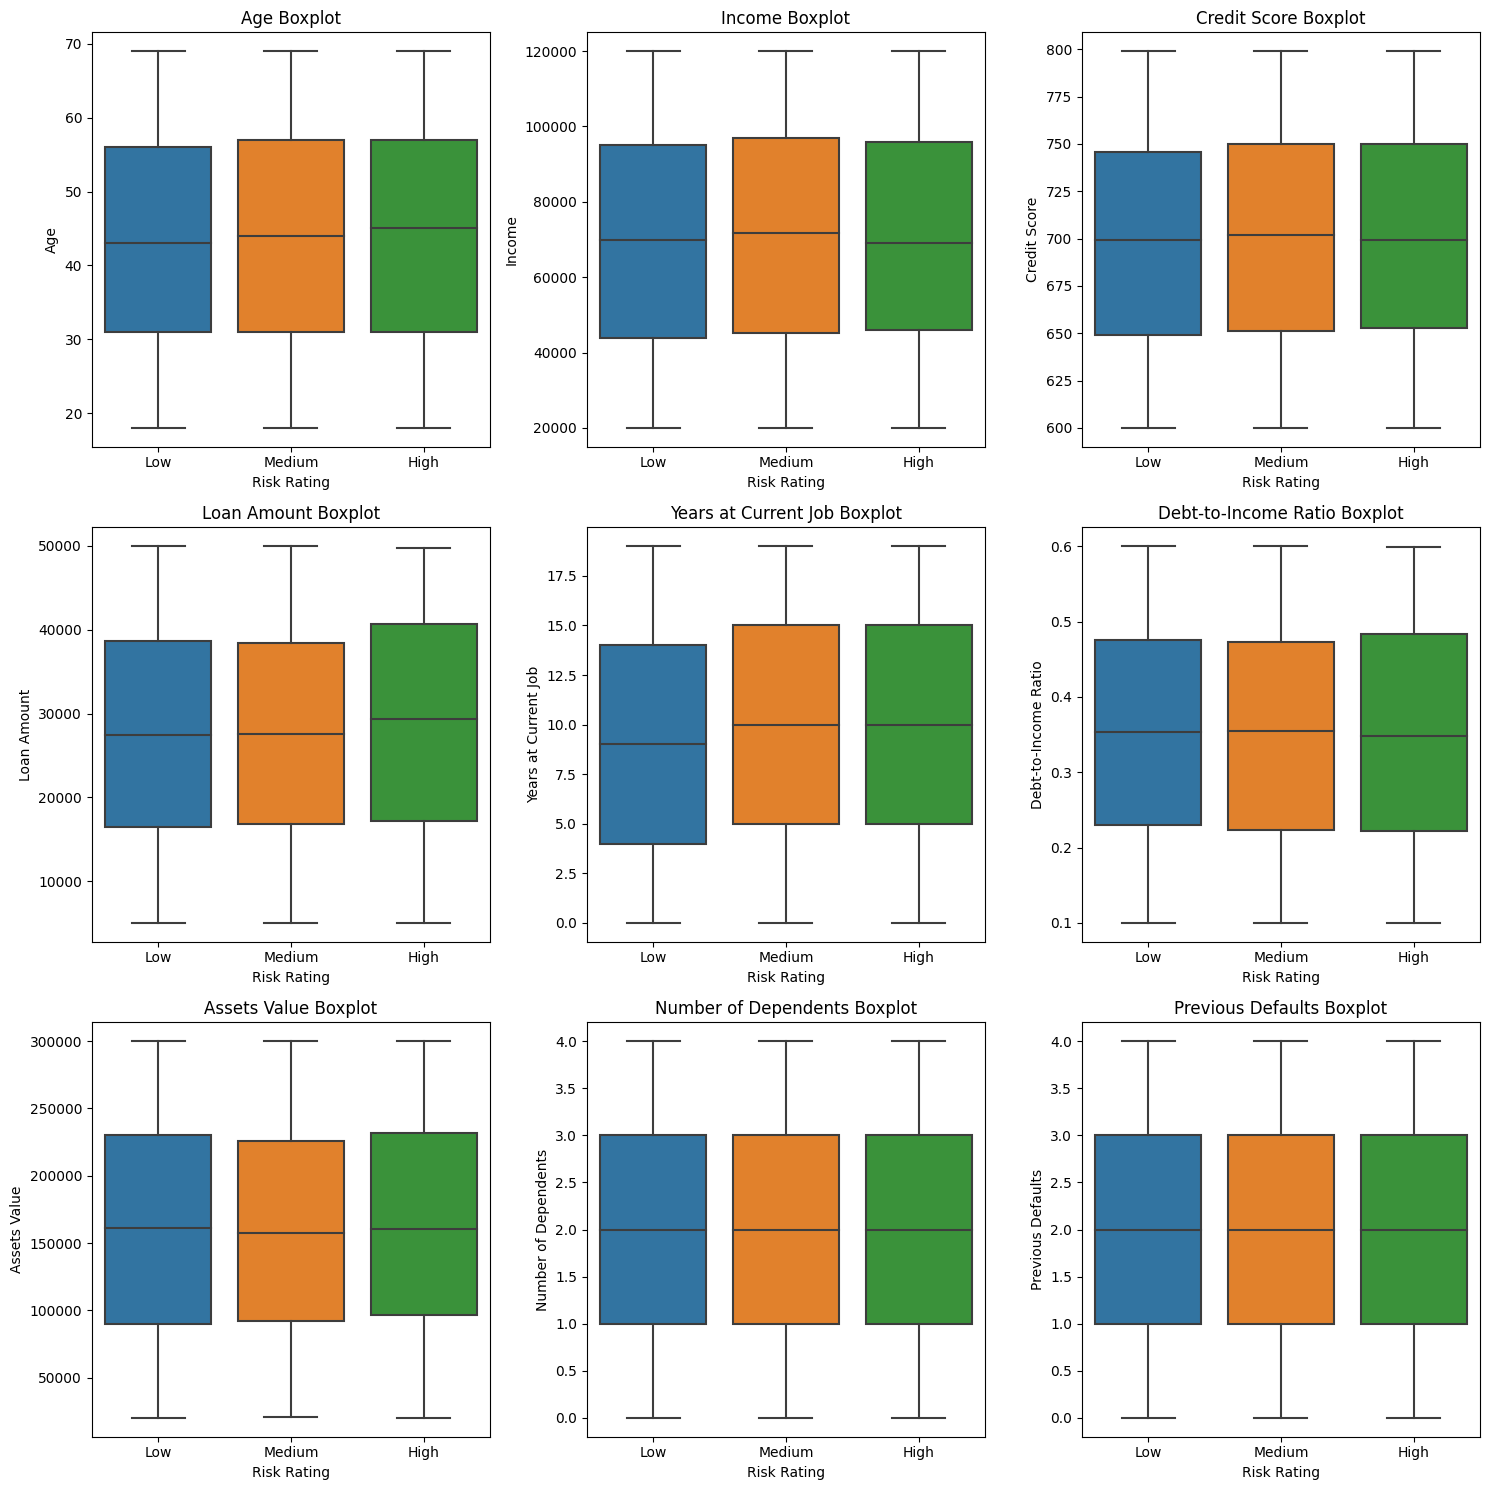

In [196]:
f, ax = plt.subplots(3,3, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols[0:9]):
    sns.boxplot(data=df, x ='Risk Rating' , y= cols, ax = ax[index])
    ax[index].set_title(f'{cols} Boxplot')
    
plt.tight_layout()
plt.show()  

## **CountPlot**

In [197]:
cat_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
       'Employment Status', 'Payment History',  'Risk Rating']

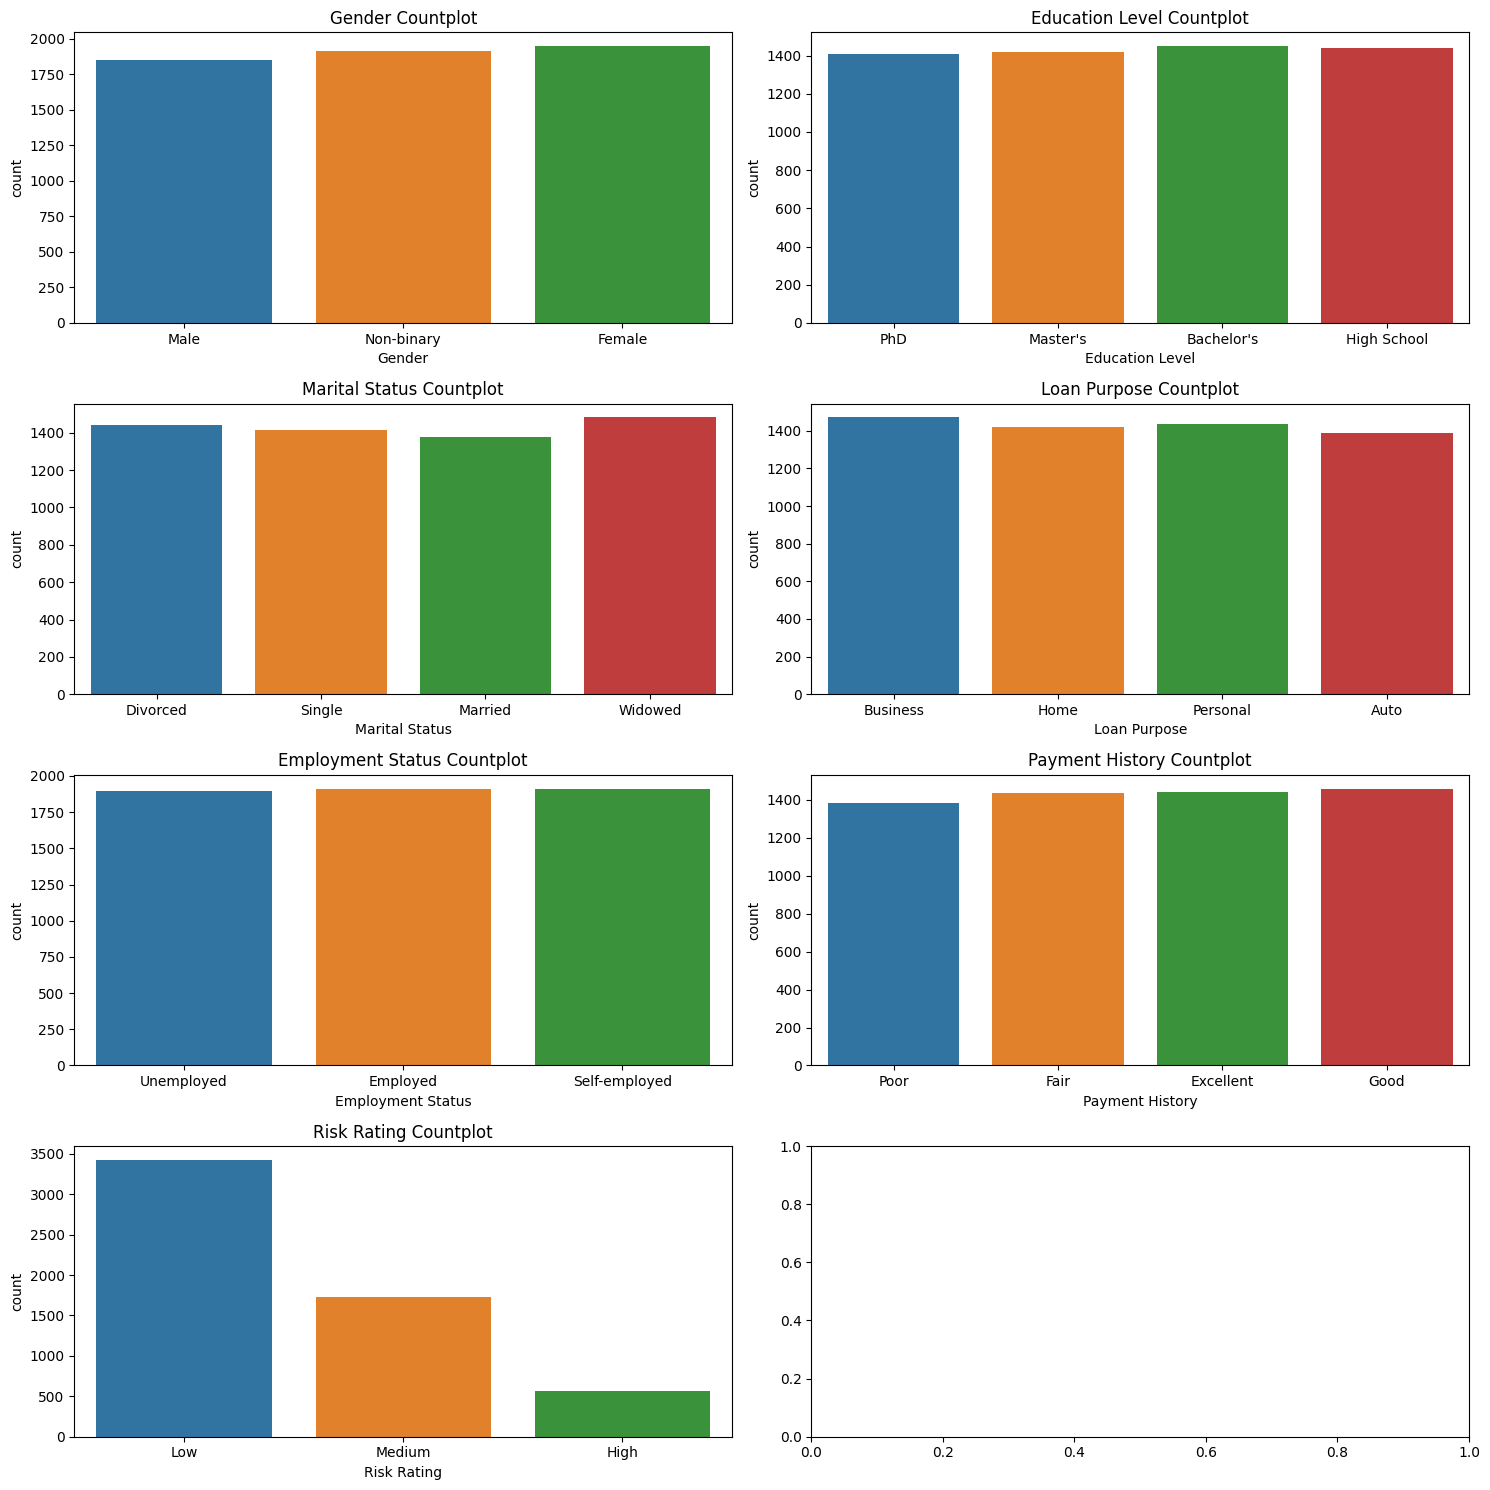

In [198]:
f, ax = plt.subplots(4,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data=df, x = cols, ax = ax[index])
    ax[index].set_title(f'{cols} Countplot')
    
plt.tight_layout()
plt.show()  

## **Correlation**

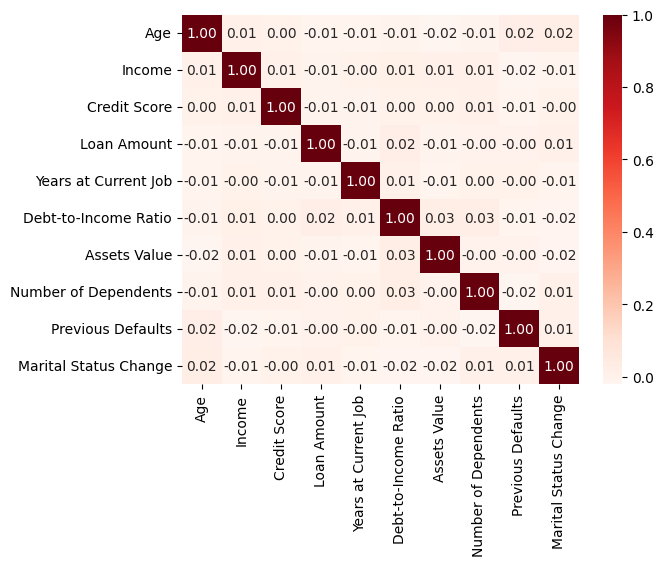

In [199]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

## **ML**

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

**Label Encoder**

In [201]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [202]:
x = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

**Standard Scale**

In [203]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

**Train Test Split**

In [204]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Modeling**

In [205]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.6066
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.61      0.98      0.76       706
           2       0.00      0.00      0.00       335

    accuracy                           0.61      1144
   macro avg       0.20      0.33      0.25      1144
weighted avg       0.38      0.61      0.47      1144



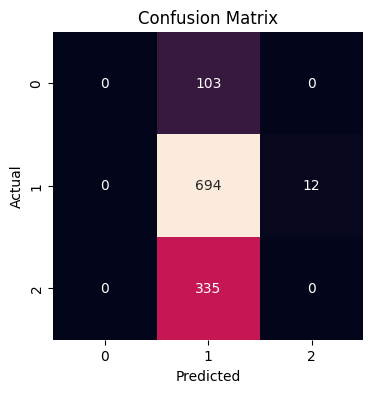

--------------------------------------------------
Support Vector Machine accuracy: 0.6171
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.62      1.00      0.76       706
           2       0.00      0.00      0.00       335

    accuracy                           0.62      1144
   macro avg       0.21      0.33      0.25      1144
weighted avg       0.38      0.62      0.47      1144



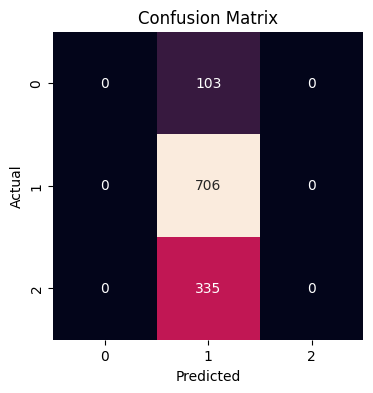

--------------------------------------------------
Ada Boost accuracy: 0.6093
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.62      0.99      0.76       706
           2       0.00      0.00      0.00       335

    accuracy                           0.61      1144
   macro avg       0.21      0.33      0.25      1144
weighted avg       0.38      0.61      0.47      1144



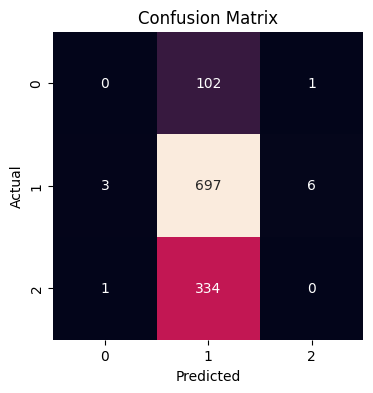

--------------------------------------------------
Gradient Boostng accuracy: 0.6119
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.62      0.97      0.76       706
           2       0.41      0.05      0.09       335

    accuracy                           0.61      1144
   macro avg       0.34      0.34      0.28      1144
weighted avg       0.50      0.61      0.49      1144



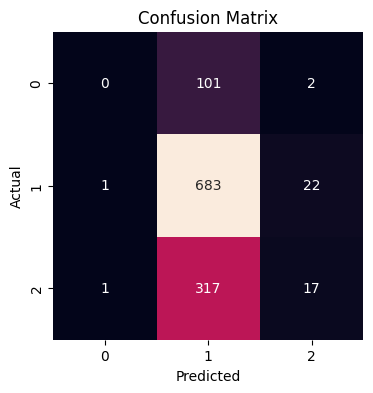

--------------------------------------------------
Logistic Regression accuracy: 0.6171
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.62      1.00      0.76       706
           2       0.00      0.00      0.00       335

    accuracy                           0.62      1144
   macro avg       0.21      0.33      0.25      1144
weighted avg       0.38      0.62      0.47      1144



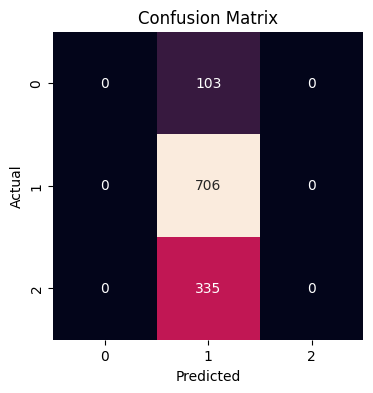

--------------------------------------------------
XGBoost accuracy: 0.5682
              precision    recall  f1-score   support

           0       0.17      0.02      0.03       103
           1       0.62      0.84      0.71       706
           2       0.31      0.16      0.21       335

    accuracy                           0.57      1144
   macro avg       0.37      0.34      0.32      1144
weighted avg       0.49      0.57      0.51      1144



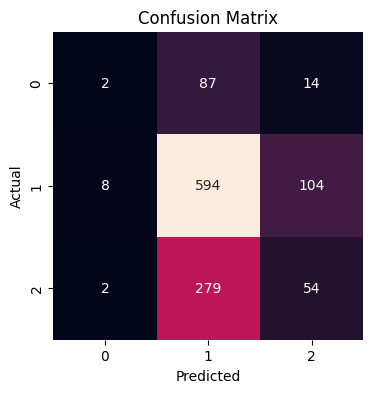

--------------------------------------------------


In [206]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

In [207]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

## **ANN**

In [208]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [209]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [210]:
train_labels = train_dataset.pop('Risk Rating')
test_labels = test_dataset.pop('Risk Rating')

In [211]:
def build_model():
    model = keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu',input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='softmax')
    ])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [212]:
model = build_model()
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)               │ (None, 8)              │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593 (2.32 KB)

 Trainable params: 593 (2.32 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)
history

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6006 - loss: 0.0000e+00
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5977 - loss: 0.0000e+00
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5873 - loss: 0.0000e+00
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5918 - loss: 0.0000e+00
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5998 - loss: 0.0000e+00
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5928 - loss: 0.0000e+00
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5970 - loss: 0.0000e+00
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6030 - loss: 0.0000e+00
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5894 - loss: 0.0000e+00
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5909 - loss: 0.0000e+00
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5853 - loss: 0.0000e+00
Epoch 12

In [214]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6205 - loss: 0.0000e+00  
Test Accuracy: 0.6171


**Thankyou. Please leave your advice in the comments**